In [1]:
import settings.config as cfg

preprocessed_dataset_folder = cfg.preprocessed_dataset_folder
group_sizes_to_create = cfg.group_sizes_to_create
group_similarity_to_create = cfg.group_similarity_to_create
group_number = cfg.group_number

print(group_number)

20


In [2]:
import pandas as pd

ratings_df = pd.read_csv(preprocessed_dataset_folder+"/ratings.csv") 
display(ratings_df.head(10))

,user,item,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
5,1,1197,3
6,1,1287,5
7,1,2804,5
8,1,594,4
9,1,919,4


# Similarity evaluation

Evaluation of the similarity between all the pairs o users in the dataset.

In [3]:
# computing similarity between each pair of users

import numpy as np

user_matrix = ratings_df.pivot_table(columns='item', index='user', values='rating')

user_id_set = set(ratings_df['user'])
user_id_indexes = user_matrix.index.values
user_matrix = user_matrix.fillna(0)
numpy_array = user_matrix.to_numpy()
sim_matrix = np.corrcoef(numpy_array)

# display(sim_matrix)
# display(list(user_id_indexes))
# display(user_id_set)

## Visualization of the similarity distribution

Text(0.5, 0, "Pearson's Correlation Coeficient")

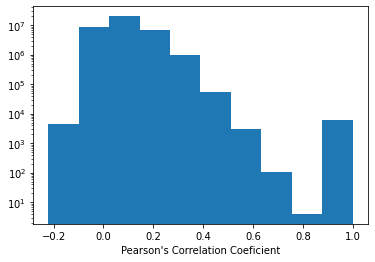

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(sim_matrix.flatten())
plt.yscale("log")
plt.xlabel("Pearson's Correlation Coeficient")


In [5]:
from synthetic_groups_generation.groups_generators import GroupsGenerator

group_list = list()
for group_type in group_similarity_to_create:
    print(group_type)
    grpGenerator = GroupsGenerator.getGroupsGenerator(group_type)
    current_list = grpGenerator.generateGroups(user_id_indexes, user_id_set, sim_matrix, group_sizes_to_create, group_number)
    
    display(pd.DataFrame.from_records(current_list))
    
    group_list = group_list + current_list

RANDOM
20
40
60


,group_size,group_similarity,group_members,avg_similarity
0,2,random,"[4805, 5428]",0.095566
1,2,random,"[5251, 146]",0.136992
2,2,random,"[3916, 4539]",0.046719
3,2,random,"[2059, 5558]",0.066448
4,2,random,"[1789, 463]",0.162919
5,2,random,"[3234, 4068]",-0.008439
6,2,random,"[5216, 4855]",0.089651
7,2,random,"[339, 5736]",0.067340
8,2,random,"[153, 4515]",-0.010605
9,2,random,"[3450, 2157]",0.116474


SIMILAR
20
40
60


,group_size,group_similarity,group_members,avg_similarity
0,2,similar,"[5506, 1042]",0.521553
1,2,similar,"[772, 5399]",0.503934
2,2,similar,"[5968, 2527]",0.559906
3,2,similar,"[5967, 6012]",0.556509
4,2,similar,"[1722, 4972]",0.555798
5,2,similar,"[320, 128]",0.516437
6,2,similar,"[4597, 4623]",0.569159
7,2,similar,"[2447, 1770]",0.505317
8,2,similar,"[4146, 4111]",0.525510
9,2,similar,"[381, 3354]",0.544850


DIVERGENT
20
40
60


,group_size,group_similarity,group_members,avg_similarity
0,2,divergent,"[5998, 4021]",-0.124860
1,2,divergent,"[4055, 5990]",-0.118536
2,2,divergent,"[2738, 1764]",-0.101327
3,2,divergent,"[2962, 4572]",-0.102554
4,2,divergent,"[3658, 2541]",-0.102937
5,2,divergent,"[1683, 1050]",-0.120145
6,2,divergent,"[2026, 2777]",-0.136248
7,2,divergent,"[4083, 3245]",-0.112461
8,2,divergent,"[5362, 2063]",-0.114400
9,2,divergent,"[5751, 1019]",-0.100925


SIMILAR_ONE_DIVERGENT
20
40
60


,group_size,group_similarity,group_members,avg_similarity
0,2,similar_one_divergent,"[5172, 3806]",-0.106321
1,2,similar_one_divergent,"[2230, 1496]",-0.114751
2,2,similar_one_divergent,"[3328, 2279]",-0.110200
3,2,similar_one_divergent,"[2581, 1764]",-0.106555
4,2,similar_one_divergent,"[3191, 629]",-0.100546
5,2,similar_one_divergent,"[2978, 1764]",-0.101726
6,2,similar_one_divergent,"[896, 4508]",-0.100339
7,2,similar_one_divergent,"[881, 4408]",-0.135504
8,2,similar_one_divergent,"[927, 3762]",-0.102132
9,2,similar_one_divergent,"[5302, 2857]",-0.106512


In [6]:
# group_list = group_list_random + group_list_similar + group_list_divergent + group_list_sim_one_div
#group_list = group_list_sim_one_div

group_dict = dict()
for group_id, group in zip(range(len(group_list)), group_list):
    group_dict[group_id] = group
display(group_dict)

{0: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [4805, 5428],
  'avg_similarity': 0.0955658659888202},
 1: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [5251, 146],
  'avg_similarity': 0.13699190600547223},
 2: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [3916, 4539],
  'avg_similarity': 0.0467192912660283},
 3: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [2059, 5558],
  'avg_similarity': 0.06644801604790271},
 4: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [1789, 463],
  'avg_similarity': 0.16291901426923158},
 5: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [3234, 4068],
  'avg_similarity': -0.008438825148142237},
 6: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [5216, 4855],
  'avg_similarity': 0.08965148718304408},
 7: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [339, 5736],
  'avg_simila

In [7]:
# simple similarity viewer per group
np.set_printoptions(precision=4, suppress=True)
idx = 200
member_index = [user_id_indexes.tolist().index(member) for member in group_dict[idx]["group_members"]]
s = sim_matrix[member_index]
s[:,member_index]

array([[ 1.    ,  0.5394,  0.449 ,  0.0224],
       [ 0.5394,  1.    ,  0.5464, -0.1032],
       [ 0.449 ,  0.5464,  1.    , -0.0597],
       [ 0.0224, -0.1032, -0.0597,  1.    ]])

In [8]:
import pickle
pickle.dump(group_dict, open(preprocessed_dataset_folder+"/group_composition.pkl", "wb"))

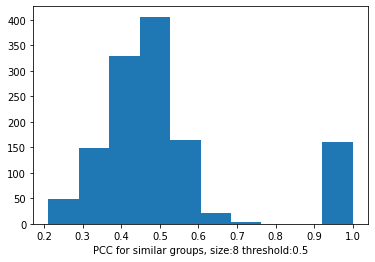

In [9]:
group_similarity = "similar"
group_size = 8
histogram_list = []
for gid in group_dict.keys():
    g = group_dict[gid]
    if g["group_similarity"] == group_similarity and g["group_size"] == group_size:
        member_index = [user_id_indexes.tolist().index(member) for member in g["group_members"]]
        s = sim_matrix[member_index]
        histogram_list.extend(s[:,member_index].flatten().tolist())

        
plt.hist(histogram_list)
#plt.yscale("log")
plt.xlabel("PCC for "+group_similarity+" groups, size:"+str(group_size)+" threshold:"+str(cfg.similar_threshold))    
plt.savefig("pcc_"+group_similarity+"_"+str(group_size)+"_"+str(int(cfg.similar_threshold*10))+".png", dpi=300)

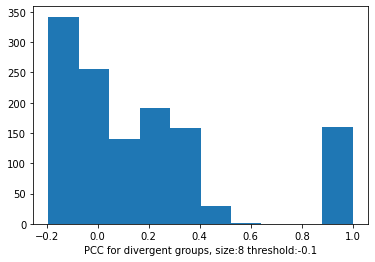

In [10]:
group_similarity = "divergent"
group_size = 8
histogram_list = []
for gid in group_dict.keys():
    g = group_dict[gid]
    if g["group_similarity"] == group_similarity and g["group_size"] == group_size:
        member_index = [user_id_indexes.tolist().index(member) for member in g["group_members"]]
        s = sim_matrix[member_index]
        histogram_list.extend(s[:,member_index].flatten().tolist())

        
plt.hist(histogram_list)
#plt.yscale("log")
plt.xlabel("PCC for "+group_similarity+" groups, size:"+str(group_size)+" threshold:"+str(cfg.dissimilar_threshold))    
plt.savefig("pcc_"+group_similarity+"_"+str(group_size)+"_"+str(int(cfg.dissimilar_threshold*10))+".png", dpi=300)

In [11]:
groups_list = list()
for group in group_dict:
    groups_list.append(
        {
            'group_id': group,
            'group_size': group_dict[group]['group_size'],
            'group_similarity': group_dict[group]['group_similarity'],
            'group_members': group_dict[group]['group_members'],
            'avg_similarity': group_dict[group]['avg_similarity']
        }
    )

groups_df = pd.DataFrame.from_records(groups_list)
display(groups_df.head(10))

,group_id,group_size,group_similarity,group_members,avg_similarity
0,0,2,random,"[4805, 5428]",0.095566
1,1,2,random,"[5251, 146]",0.136992
2,2,2,random,"[3916, 4539]",0.046719
3,3,2,random,"[2059, 5558]",0.066448
4,4,2,random,"[1789, 463]",0.162919
5,5,2,random,"[3234, 4068]",-0.008439
6,6,2,random,"[5216, 4855]",0.089651
7,7,2,random,"[339, 5736]",0.067340
8,8,2,random,"[153, 4515]",-0.010605
9,9,2,random,"[3450, 2157]",0.116474


### Comparing groups internal average similarity between the different types and sizes 

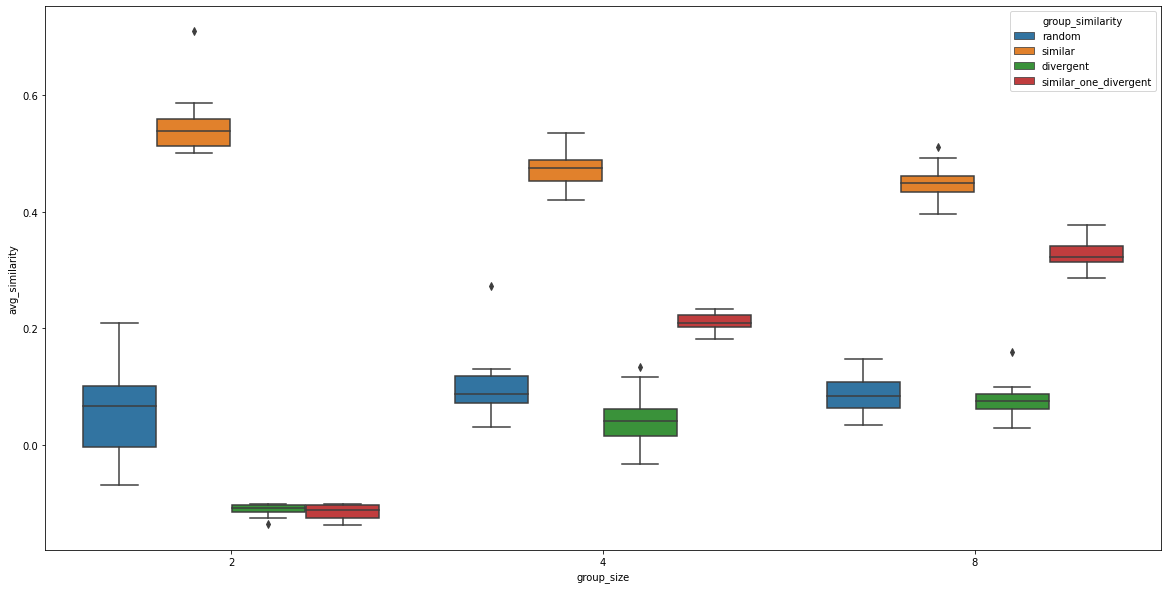

In [12]:
import seaborn as sns


plt.rcParams["figure.figsize"] = (20,10)
sns.boxplot(x = groups_df['group_size'],
            y = groups_df['avg_similarity'],
            hue = groups_df['group_similarity'])
import matplotlib.pyplot as plt

In [13]:
groups_df.to_csv(preprocessed_dataset_folder+"/group_composition.csv")